<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/Predict-CO2-Emissions-in-Rwanda/%EC%97%90%EB%9F%AC%EA%B0%80_%EC%96%B4%EB%94%94%EC%84%9C_%EC%9D%BC%EC%96%B4%EB%82%98%EB%8A%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

train = pd.read_csv('drive/MyDrive/train.csv')
test = pd.read_csv('drive/MyDrive/test.csv')

## (1) 복사붙여넣기 모델
- 정답 데이터 : 2021년 데이터
- 예측 데이터 : 2019년 데이터

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_true = train.loc[train['year']==2021, 'emission']
y_pred = train.loc[train['year']==2019, 'emission']
rmse_pred = mean_squared_error(y_true, y_pred, squared=False)

np.round(rmse_pred, 2)

19.65

In [7]:
df2019 = train[train['year']==2019].pivot_table(index='week_no', columns=['longitude', 'latitude'], values='emission')
df2021 = train[train['year']==2021].pivot_table(index='week_no',columns=['longitude','latitude'],values='emission')
df2021.head(3)

longitude,28.228,28.249,28.297,28.304,28.306,28.311,28.353,28.364,28.380,28.398,...,31.396,31.397,31.405,31.436,31.442,31.450,31.466,31.494,31.524,31.532
latitude,-2.972,-2.451,-1.903,-1.696,-2.794,-2.589,-2.447,-1.536,-2.820,-1.902,...,-1.004,-1.203,-1.695,-1.764,-1.858,-0.950,-1.534,-0.806,-1.176,-1.068
week_no,,,,,,,,,,,,,,,,,,,,,
0,1.674448,1.503159,4.195794,0.0,1.077107,0.846834,0.749050,0.777104,16.419092,0.919132,...,7.433182,203.4762,0.344111,3.905477,2.179767,1.499618,5.829081,2.810005,11.542830,188.12369
1,1.861734,1.613714,5.304614,0.0,1.156327,0.966796,0.804141,0.834258,20.867610,1.002699,...,8.254317,279.3525,0.362147,4.264763,2.388954,1.668141,6.439675,3.012746,12.864378,255.15877
2,1.845905,1.550840,5.305589,0.0,1.111274,0.980129,0.772810,0.801754,21.204150,0.977749,...,8.405481,284.2875,0.372086,4.354809,2.437937,1.698216,6.563126,2.905183,13.092283,259.46307


In [12]:
mse_df2019_df2021 = ((df2019 - df2021) ** 2).mean()
mse_df2019_df2021.rename('MSE', inplace=True)
mse_df2019_df2021 = mse_df2019_df2021.to_frame() # 시리즈를 데이터 프레임으로 바꾸기
mse_df2019_df2021['Percentage'] = mse_df2019_df2021['MSE']/mse_df2019_df2021['MSE'].sum()*100

mse_df2019_df2021

,,MSE,Percentage
longitude,latitude,,
28.228,-2.972,0.925308,0.000482
28.249,-2.451,3.997516,0.002083
28.297,-1.903,5.015262,0.002614
28.304,-1.696,0.000000,0.000000
28.306,-2.794,2.052571,0.001070
...,...,...,...
31.450,-0.950,0.034388,0.000018
31.466,-1.534,0.128750,0.000067
31.494,-0.806,12.611633,0.006573


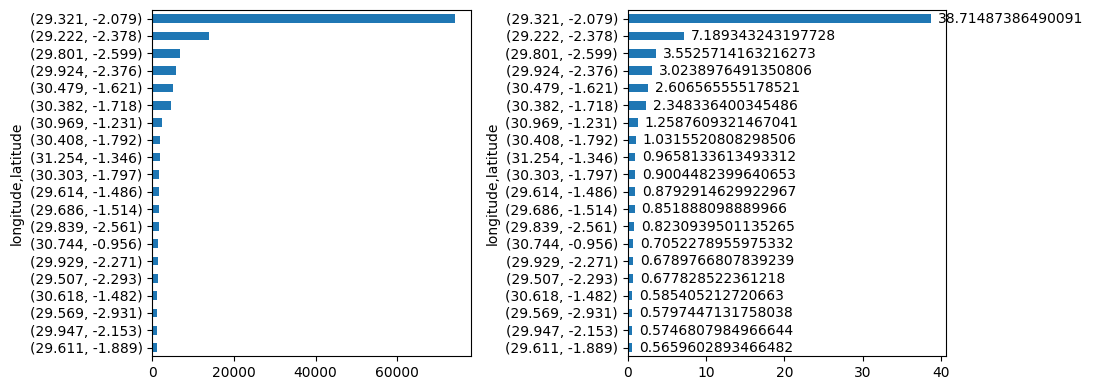

In [15]:
import matplotlib.pyplot as plt

# 가장 에러가 큰 location 값 찾기
mse_rank = mse_df2019_df2021.sort_values(by='MSE', ascending=False)

fig, axs = plt.subplots(1, 2, figsize=(11, 4))

# MSE
mse_rank['MSE'].head(20).sort_values().plot(kind='barh', ax=axs[0])

# Percentage
perc_plot = mse_rank['Percentage'].head(20).sort_values().plot(kind='barh', ax=axs[1])

for p in perc_plot.patches:
    perc_plot.annotate(
        p.get_width(),
        (p.get_x() + p.get_width(), p.get_y()),
        xytext=(5,0),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

위와 같이 상위 두개의 locations이 거의 45%의 에러를 만들었다.

In [16]:
emission_series = train.pivot_table(
    index=['year', 'week_no'],
    columns=['longitude', 'latitude'],
    values='emission'
)
emission_series

longitude       28.228    28.249    28.297 28.304    28.306    28.311  \
latitude        -2.972    -2.451    -1.903 -1.696    -2.794    -2.589   
year week_no                                                            
2019 0        2.866021  3.822496  7.459439    0.0  2.739057  0.901502   
     1        2.913657  3.799000  7.826922    0.0  2.722221  0.954647   
     2        2.890479  3.648624  7.916551    0.0  2.614467  0.999740   
     3        2.938355  3.716658  8.102237    0.0  2.663217  1.012966   
     4        2.882489  3.609828  8.171193    0.0  2.586667  1.009565   
...                ...       ...       ...    ...       ...       ...   
2021 48       2.542527  2.579547  6.965153    0.0  1.848406  1.155578   
     49       2.528588  2.577117  6.912872    0.0  1.846665  1.144107   
     50       2.553652  2.691392  7.035590    0.0  1.928550  1.116541   
     51       2.539225  2.700769  6.752853    0.0  1.935269  1.099455   
     52       2.442766  2.642306  6.632658    0.0  1.893377  1.038337   

longitude       28.353    28.364     28.380    28.398  ...    31.396  \
latitude        -2.447    -1.536     -2.820    -1.902  ...    -1.004   
year week_no                                           ...             
2019 0        1.904815  1.976155  20.011312  1.990763  ...  7.779137   
     1        1.893106  1.964008  21.809752  1.994771  ...  8.148461   
     2        1.818171  1.886267  23.027409  1.938755  ...  8.468456   
     3        1.852073  1.921439  23.541098  1.973406  ...  8.598759   
     4        1.798838  1.866210  24.120808  1.923802  ...  8.600846   
...                ...       ...        ...       ...  ...       ...   
2021 48       1.285432  1.333575  24.820140  1.494909  ...  9.565760   
     49       1.284221  1.332319  24.550900  1.490627  ...  9.522097   
     50       1.341166  1.391397  24.338018  1.535051  ...  9.376157   
     51       1.345839  1.396244  23.188467  1.534592  ...  9.387755   
     52       1.316706  1.366020  22.456118  1.491043  ...  8.878016   

longitude        31.397    31.405    31.436    31.442    31.450    31.466  \
latitude         -1.203    -1.695    -1.764    -1.858    -0.950    -1.534   
year week_no                                                                
2019 0        272.75030  0.348795  4.046323  2.263289  1.571036  6.081469   
     1        302.54440  0.357533  4.210181  2.358366  1.646743  6.357142   
     2        320.98932  0.365826  4.354758  2.441885  1.712236  6.597198   
     3        329.87130  0.373085  4.427652  2.482038  1.738348  6.701429   
     4        343.37020  0.375933  4.438685  2.487003  1.738375  6.707658   
...                 ...       ...       ...       ...       ...       ...   
2021 48       331.31213  0.528113  4.753253  2.683791  2.089992  7.416772   
     49       327.51834  0.529593  4.749030  2.679207  2.078879  7.390748   
     50       328.02420  0.527774  4.704530  2.650555  2.044470  7.290150   
     51       305.78232  0.540021  4.762427  2.676683  2.042309  7.322506   
     52       301.12552  0.511590  4.507837  2.533099  1.931055  6.926699   

longitude       31.494     31.524     31.532  
latitude        -0.806     -1.176     -1.068  
year week_no                                  
2019 0        6.932662  12.106389  254.38388  
     1        6.894024  12.699330  280.58660  
     2        6.629840  13.211398  296.56010  
     3        6.753724  13.410891  304.59177  
     4        6.565181  13.407740  316.09482  
...                ...        ...        ...  
2021 48       4.788533  14.975136  303.68405  
     49       4.785121  14.895861  300.35740  
     50       4.988006  14.649881  300.97610  
     51       5.010404  14.635458  281.71732  
     52       4.895467  13.838275  277.04000  

[159 rows x 497 columns]

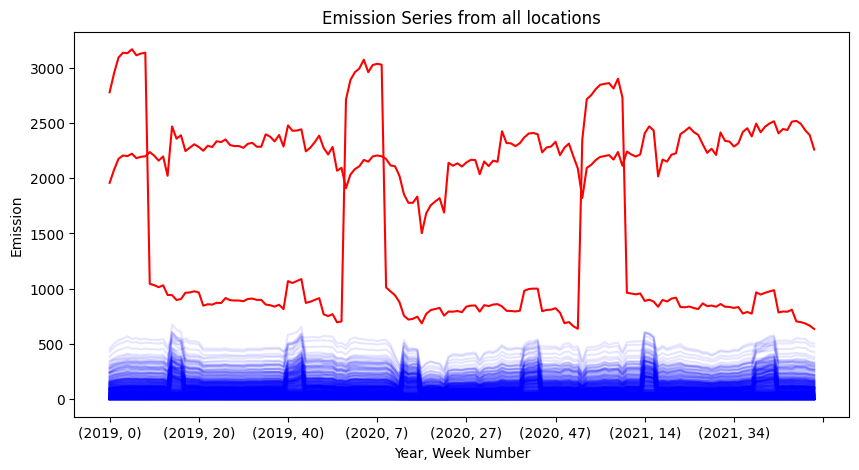

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))

# 평균이 1000 초과인 지역
emission_series.loc[:, emission_series.mean() > 1000].plot(ax=ax, color='red', legend=False)

# 평균이 1000 미만인 지역
emission_series.loc[:, emission_series.mean() < 1000].plot(ax=ax, color='blue', alpha=0.1, legend=False)

# Set labels and title
ax.set_xlabel('Year, Week Number')
ax.set_ylabel('Emission')
ax.set_title('Emission Series from all locations')

# Show the plot
plt.show()

2개 요소가 emission이 상대적으로 큼

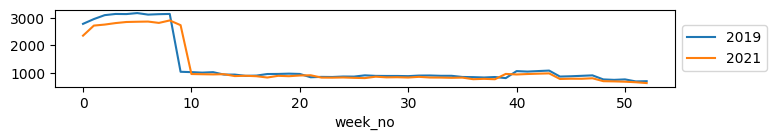

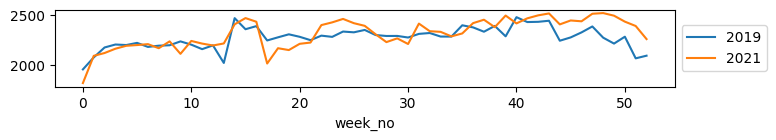

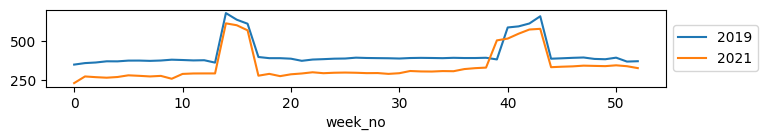

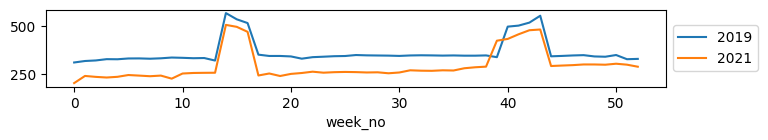

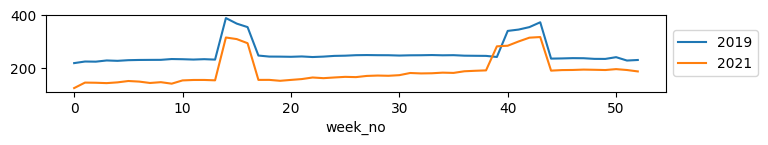

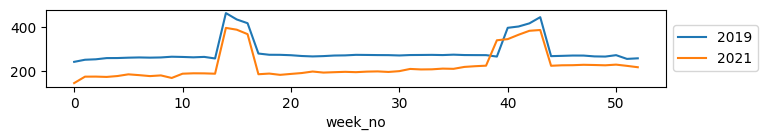

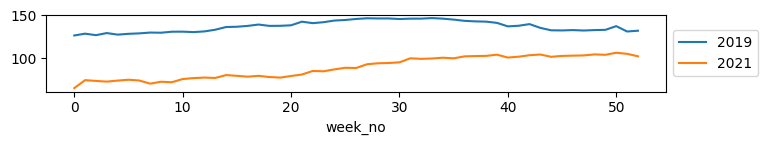

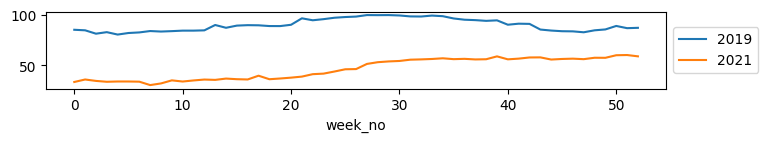

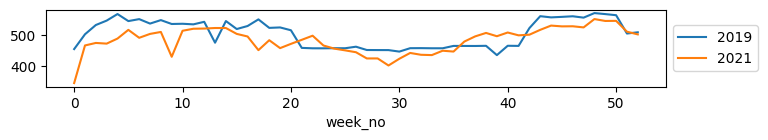

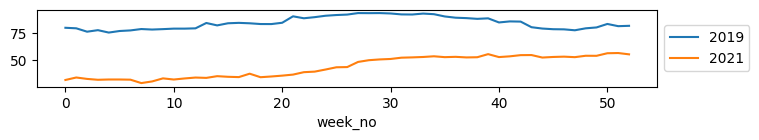

In [20]:
for idx in np.arange(10):
    # 경도가 데이터
    df_plot = train[train['longitude']==mse_rank.index.get_level_values(0)[idx]].pivot_table(index='week_no',columns='year',values='emission')
    df_plot = df_plot.drop(2020,axis=1)
    ax = df_plot.plot(figsize=(8,1))

    # Move the legend to the right outside
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))